# Week4　授業前課題2　住宅価格の予測  
＜目的＞  

- 教師あり学習（回帰問題）の概観を知る
- scikit-laernを使い回帰を行えるようにする
- 手法の簡単な比較をする  

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。
79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。


＜手法の一覧＞  
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト  

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

＜練習のための準備＞  
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説GrLivAreaとYearBuiltの2つだけを利用することにします。

### 【問題1】練習のために特徴量の選択  
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。  

In [43]:
import pandas as pd
data = pd.read_csv('train.csv')
X_df = data[['GrLivArea', 'YearBuilt']]
y_df = data['SalePrice']
display(X_df)

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
...,...,...
1455,1647,1999
1456,2073,1978
1457,2340,1941
1458,1078,1950


### 【問題2】線形回帰による推定と評価  
データを簡単に分析、前処理し、 **線形回帰** による学習、推定、評価、可視化までの一連の流れを作成・実行してください。
評価のための指標値は回帰問題では **平均二乗誤差（Mean Squared Error, MSE）** を使うことが一般的です。
可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

In [44]:
df = pd.concat([X_df, y_df], axis=1)
display(df.info())
display(df.describe())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


None

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

- すべて整数の数値データ
- 値の範囲やバラつきは異なる
- 欠損値なし

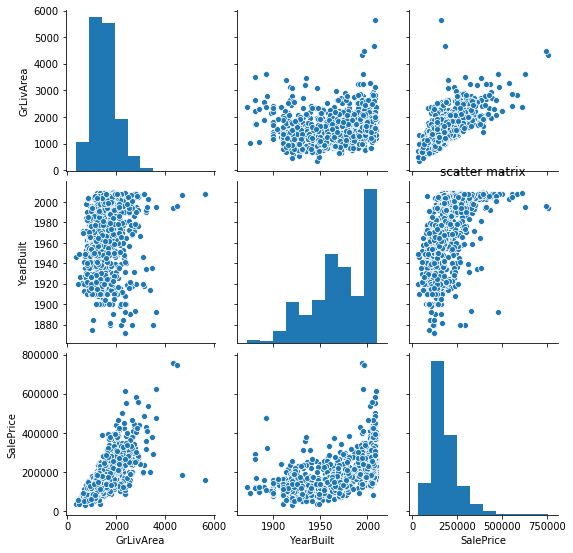

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 散布図行列
sns.pairplot(df)
plt.title('scatter matrix')
plt.show()

- 住面積と価格は右に裾の長い分布で、外れ値は多くなさそう
- 築年は新しい物件の数が多い
- 住面積、築年ともに価格との間に比例に近い関係がありそう

,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.199010,0.708624
YearBuilt,0.199010,1.000000,0.522897
SalePrice,0.708624,0.522897,1.000000


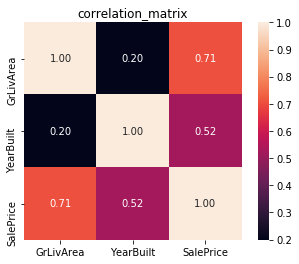

In [46]:
# 相関係数行列（Pearsonの積率相関係数）のヒートマップ
cor_matrix = df.corr(method='pearson')
display(cor_matrix)

sns.heatmap(cor_matrix, cbar=True, annot=True,
           square=True, fmt='.2f') 
plt.title("correlation_matrix")
plt.show()

- 住面積と価格の間には、やや強い正の相関がありそう
- 築年と価格との間にも、中程度の正の相関がありそう
- 住面積と築年との間に強い相関はなく、多重共線性の問題はなさそう

In [47]:
# 訓練データと検証データに分ける
from sklearn.model_selection import train_test_split
import numpy as np

X = X_df.values
y = y_df.values.flatten()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

print('X_train :{}'.format(np.shape(X_train)))
print('y_train :{}'.format(np.shape(y_train)))
print('X_test :{}'.format(np.shape(X_test)))
print('y_test :{}'.format(np.shape(y_test)))

X_train :(1095, 2)
y_train :(1095,)
X_test :(365, 2)
y_test :(365,)


In [49]:
# 前処理として標準化
import numpy as np
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
sc_x.fit(X_train)
sc_y.fit(y_train[:, np.newaxis])
X_train_std = sc_x.transform(X_train)
X_test_std = sc_x.transform(X_test)
y_train_std = sc_y.transform(y_train[:, np.newaxis])
y_test_std = sc_y.transform(y_test[:, np.newaxis])

print(X_train_std[:3])
print(y_train_std[:3])

[[ 1.64748115 -2.61683012]
 [-0.09521056  0.6622233 ]
 [-1.08660851 -0.19894225]]
[[-0.92944218]
 [-0.26313581]
 [-0.45350906]]


In [50]:
# 変数毎に線形回帰モデルの学習
from sklearn.linear_model import LinearRegression

X1_train_std = X_train_std[:, 0][:, np.newaxis]
X2_train_std = X_train_std[:, 1][:, np.newaxis]
slr = LinearRegression()
slr_1 = LinearRegression()
slr_2 = LinearRegression()
slr.fit(X_train_std, y_train_std)
slr_1.fit(X1_train_std, y_train_std)
slr_2.fit(X2_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

< Linear Regression >


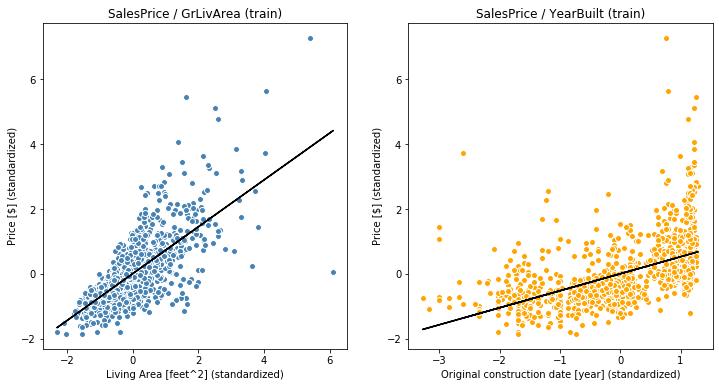

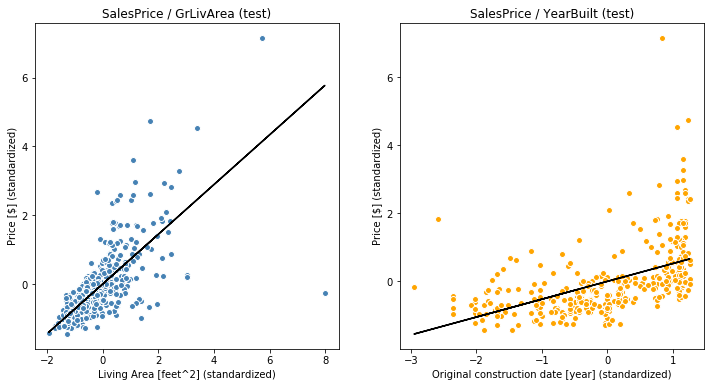

In [51]:
# 可視化
# 訓練データ
print("< Linear Regression >")

y1_train_pred = slr_1.predict(X1_train_std)
y2_train_pred = slr_2.predict(X2_train_std)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X1_train_std, y_train_std, color ='steelblue', edgecolor='white')
plt.plot(X1_train_std, y1_train_pred, color='black')
plt.title("SalesPrice / GrLivArea (train)")
plt.xlabel('Living Area [feet^2] (standardized)')
plt.ylabel('Price [$] (standardized)')
           
plt.subplot(1,2,2)
plt.scatter(X2_train_std, y_train_std, color ='orange', edgecolor='white')
plt.plot(X2_train_std, y2_train_pred, color='black')
plt.title("SalesPrice / YearBuilt (train)")
plt.xlabel('Original construction date [year] (standardized)')
plt.ylabel('Price [$] (standardized)')

plt.show()

# 検証データ
X1_test_std = X_test_std[:, 0][:, np.newaxis]
X2_test_std = X_test_std[:, 1][:, np.newaxis]
y1_test_pred = slr_1.predict(X1_test_std)
y2_test_pred = slr_2.predict(X2_test_std)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X1_test_std, y_test_std, color ='steelblue', edgecolor='white')
plt.plot(X1_test_std, y1_test_pred, color='black')
plt.title("SalesPrice / GrLivArea (test)")
plt.xlabel('Living Area [feet^2] (standardized)')
plt.ylabel('Price [$] (standardized)')
           
plt.subplot(1,2,2)
plt.scatter(X2_test_std, y_test_std, color ='orange', edgecolor='white')
plt.plot(X2_test_std, y2_test_pred, color='black')
plt.title("SalesPrice / YearBuilt (test)")
plt.xlabel('Original construction date [year] (standardized)')
plt.ylabel('Price [$] (standardized)')

plt.show()

In [52]:
# 訓練データ、検証データ、全体でMSE算出
from sklearn.metrics import mean_squared_error

print('MSE train (GrLiveArea) : {:.3f}'.format(mean_squared_error(y_train_std, y1_train_pred)))
print('MSE train (YearBuilt) : {:.3f}'.format(mean_squared_error(y_train_std, y2_train_pred)))
print('MSE test (GrLiveArea) : {:.3f}'.format(mean_squared_error(y_test_std, y1_test_pred)))
print('MSE test (YearBuilt) : {:.3f}'.format(mean_squared_error(y_test_std, y2_test_pred)))

MSE train (GrLiveArea) : 0.476
MSE train (YearBuilt) : 0.725
MSE test (GrLiveArea) : 0.597
MSE test (YearBuilt) : 0.778


- 回帰直線をみると、住面積よりも築年の方が残差が大きい
- MSEも築年の方が大きく、単独で見れば価格の予想には住面積の方が精度が高そう

In [53]:
# MSE(全体)を算出しリストに格納
y_test_pred = slr.predict(X_test_std)

MSEs = []
MSE = mean_squared_error(y_test_std, y_test_pred)
MSEs.append(MSE)
print('MSE test : {:.3f}'.format(MSE))

# 決定係数算出(全体)
from sklearn.metrics import r2_score
R2s = []
R2 = r2_score(y_test_std, y_test_pred)
R2s.append(R2)
print('R^2 test : {:.3f}'.format(R2))

MSE test : 0.439
R^2 test : 0.587


### 【問題3】手法の比較  
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。
SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

< Support Vector Regression >


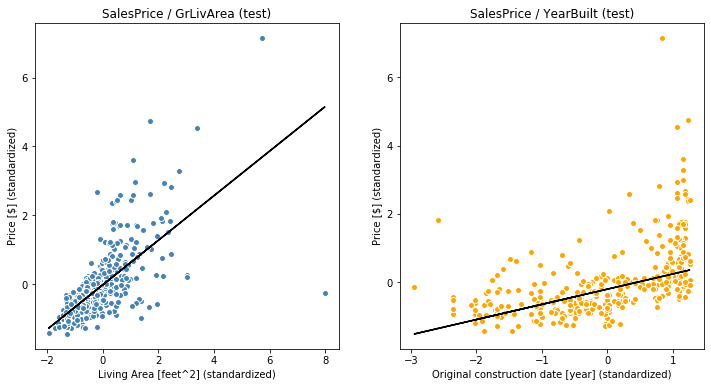

MSE test : 0.443
R^2 test : 0.584


In [54]:
# SVM
from sklearn.svm import LinearSVR
print("< Support Vector Regression >")

# 訓練データから学習し、検証データで推論
# 可視化のため、特徴量ごとにも学習・推論

svmreg = LinearSVR()
svmreg_1 = LinearSVR()
svmreg_2 = LinearSVR()
svmreg.fit(X_train_std, y_train_std.flatten())
svmreg_1.fit(X1_train_std, y_train_std.flatten())
svmreg_2.fit(X2_train_std, y_train_std.flatten())
X1_test_std = X_test_std[:, 0][:, np.newaxis]
X2_test_std = X_test_std[:, 1][:, np.newaxis]
y_test_pred = svmreg.predict(X_test_std)
y1_test_pred = svmreg_1.predict(X1_test_std)
y2_test_pred = svmreg_2.predict(X2_test_std)

# 可視化(検証データ)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X1_test_std, y_test_std, color ='steelblue', edgecolor='white')
plt.plot(X1_test_std, y1_test_pred, color='black')
plt.title("SalesPrice / GrLivArea (test)")
plt.xlabel('Living Area [feet^2] (standardized)')
plt.ylabel('Price [$] (standardized)')
           
plt.subplot(1,2,2)
plt.scatter(X2_test_std, y_test_std, color ='orange', edgecolor='white')
plt.plot(X2_test_std, y2_test_pred, color='black')
plt.title("SalesPrice / YearBuilt (test)")
plt.xlabel('Original construction date [year] (standardized)')
plt.ylabel('Price [$] (standardized)')

plt.show()

# MSE算出(全体)
MSE = mean_squared_error(y_test_std, y_test_pred)
MSEs.append(MSE)
print('MSE test : {:.3f}'.format(MSE))

# 決定係数算出(全体)
R2 = r2_score(y_test_std, y_test_pred)
R2s.append(R2)
print('R^2 test : {:.3f}'.format(R2))

< Decision Tree Regression (depth=3) >


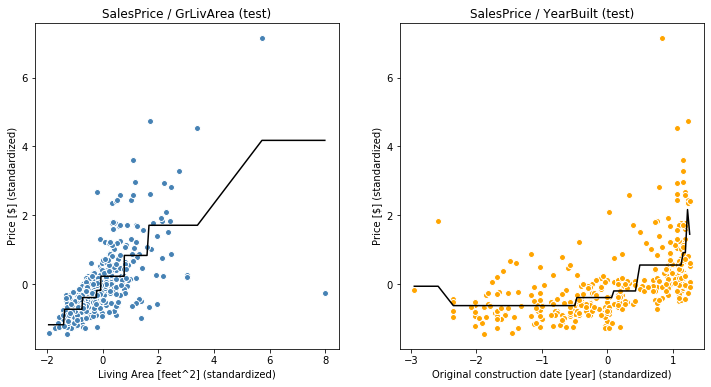

MSE test : 0.416
R^2 test : 0.609


In [55]:
# 決定木回帰(深さ：3)
from sklearn.tree import DecisionTreeRegressor
print("< Decision Tree Regression (depth=3) >")

# 訓練データから学習し、検証データで推論
# 可視化のため、特徴量ごとにも学習・推論

tree = DecisionTreeRegressor(max_depth=3)
tree_1 = DecisionTreeRegressor(max_depth=3)
tree_2 = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_std, y_train_std.flatten())
tree_1.fit(X1_train_std, y_train_std.flatten())
tree_2.fit(X2_train_std, y_train_std.flatten())
X1_test_std = X_test_std[:, 0][:, np.newaxis]
X2_test_std = X_test_std[:, 1][:, np.newaxis]
y_test_pred = tree.predict(X_test_std)
y1_test_pred = tree_1.predict(X1_test_std)
y2_test_pred = tree_2.predict(X2_test_std)

# 可視化(検証データ)
sort_indx_1 = X1_test_std.flatten().argsort()
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X1_test_std, y_test_std, color ='steelblue', edgecolor='white')
plt.plot(X1_test_std[sort_indx_1], y1_test_pred[sort_indx_1], color='black')
plt.title("SalesPrice / GrLivArea (test)")
plt.xlabel('Living Area [feet^2] (standardized)')
plt.ylabel('Price [$] (standardized)')

sort_indx_2 = X2_test_std.flatten().argsort()
plt.subplot(1,2,2)
plt.scatter(X2_test_std, y_test_std, color ='orange', edgecolor='white')
plt.plot(X2_test_std[sort_indx_2], y2_test_pred[sort_indx_2], color='black')
plt.title("SalesPrice / YearBuilt (test)")
plt.xlabel('Original construction date [year] (standardized)')
plt.ylabel('Price [$] (standardized)')

plt.show()

# MSE算出(全体)
MSE = mean_squared_error(y_test_std, y_test_pred)
MSEs.append(MSE)
print('MSE test : {:.3f}'.format(MSE))

# 決定係数算出(全体)
R2 = r2_score(y_test_std, y_test_pred)
R2s.append(R2)
print('R^2 test : {:.3f}'.format(R2))

< Random Forest Regression (depth=3) >


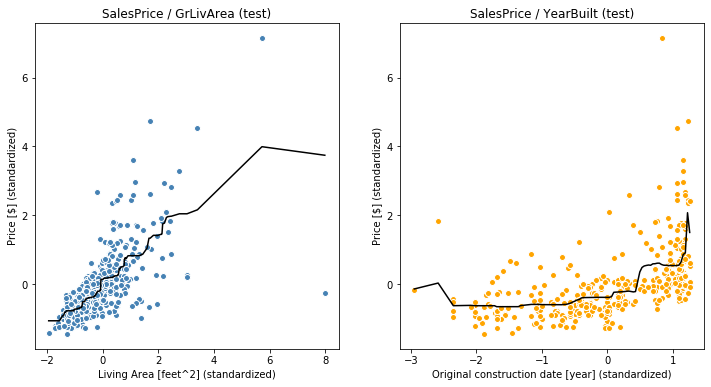

MSE test : 0.358
R^2 test : 0.663


In [56]:
# ランダムフォレスト回帰
from sklearn.ensemble import RandomForestRegressor
print("< Random Forest Regression (depth=3) >")

# 訓練データから学習し、検証データで推論
# 可視化のため、特徴量ごとにも学習・推論

forest = RandomForestRegressor(max_depth=3)
forest_1 = RandomForestRegressor(max_depth=3)
forest_2 = RandomForestRegressor(max_depth=3)
forest.fit(X_train_std, y_train_std.flatten())
forest_1.fit(X1_train_std, y_train_std.flatten())
forest_2.fit(X2_train_std, y_train_std.flatten())
X1_test_std = X_test_std[:, 0][:, np.newaxis]
X2_test_std = X_test_std[:, 1][:, np.newaxis]
y_test_pred = forest.predict(X_test_std)
y1_test_pred = forest_1.predict(X1_test_std)
y2_test_pred = forest_2.predict(X2_test_std)

# 可視化(検証データ)
sort_indx_1 = X1_test_std.flatten().argsort()
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X1_test_std, y_test_std, color ='steelblue', edgecolor='white')
plt.plot(X1_test_std[sort_indx_1], y1_test_pred[sort_indx_1], color='black')
plt.title("SalesPrice / GrLivArea (test)")
plt.xlabel('Living Area [feet^2] (standardized)')
plt.ylabel('Price [$] (standardized)')

sort_indx_2 = X2_test_std.flatten().argsort()
plt.subplot(1,2,2)
plt.scatter(X2_test_std, y_test_std, color ='orange', edgecolor='white')
plt.plot(X2_test_std[sort_indx_2], y2_test_pred[sort_indx_2], color='black')
plt.title("SalesPrice / YearBuilt (test)")
plt.xlabel('Original construction date [year] (standardized)')
plt.ylabel('Price [$] (standardized)')

plt.show()

# MSE算出(全体)
MSE = mean_squared_error(y_test_std, y_test_pred)
MSEs.append(MSE)
print('MSE test : {:.3f}'.format(MSE))

# 決定係数算出(全体)
R2 = r2_score(y_test_std, y_test_pred)
R2s.append(R2)
print('R^2 test : {:.3f}'.format(R2))

In [57]:
# 指標一覧
metrics = pd.DataFrame([MSEs, R2s],
                       index=['MSE','R^2'],
                       columns=['LR', 'SVR', 'Tree', 'Forest'])
print('< Metrics (test data) >')
display(metrics.T)

< Metrics (test data) >


,MSE,R^2
LR,0.439077,0.587104
SVR,0.442577,0.583812
Tree,0.416316,0.608507
Forest,0.357991,0.663354


### ＜考察＞  
テストデータと仮説の図から、線形回帰とSVRの仮説は直線であるのに対し、決定木とランダムフォレストは多数の直線の集まりで微分不可能な仮説となっている。今回は見やすくするために両者とも深さを3に剪定したが、指定しなければ更に動きの激しい仮説となり、過学習に陥っているように見えた。  
指標値の一覧から、1. ランダムフォレスト回帰、2. 決定木、3. 線形回帰、4. SVRの順に平均二乗誤差・決定係数ともに良い結果となった。ランダムフォレストや決定木はノンパラメトリックモデルであり、直線の仮説に比較して表現力が高いため指標の値としては良い結果となったと思われる。しかしこれららは過学習に陥りやすく、剪定などパラメータの調整が特に重要と思われる。線形回帰とSVRでは、もともと線形回帰はMSEを最小化するように学習する一方で、SVRは仮説の直線に対する垂直方向に距離を最小化するため、MSEの値は線形回帰よりSVRの方が大きくなったものと思われる。連続値を予測する回帰問題では、パラメトリックモデルである線形回帰やSVRの仮説の方が自然に感じらる。

### 【問題4】他の特徴量も使用しての学習  
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

In [58]:
# 特徴量全体の概観
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- カテゴリカル変数も含まれており、順序尺度であれば回帰に取り入れられそう
- しかし今回は、相関係数が計算可能な特徴量の上位に絞ることにする

In [59]:
# 相関係数行列（Pearsonの積率相関係数）
cor_matrix = data.iloc[:, 1:].corr(method='pearson')
display(cor_matrix)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


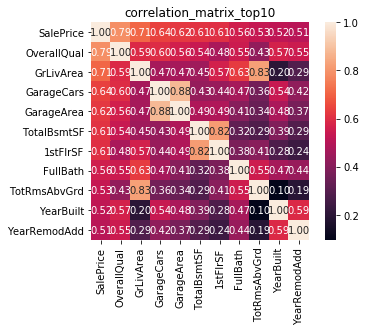

In [60]:
# 相関係数の絶対値を取得しソート、上から10個を選ぶ
cor_abs = np.abs(cor_matrix.loc[:,'SalePrice'])
cor_top10 = cor_abs.sort_values(ascending=False)[:11]

# これらの特徴量10個でヒートマップ作成
cor_matrix_top10 = data.loc[:, cor_top10.index].corr(method='pearson')
display(cor_matrix_top10)

sns.heatmap(cor_matrix_top10, cbar=True, annot=True,
           square=True, fmt='.2f') 
plt.title("correlation_matrix_top10")
plt.show()

- 以下の特徴量間には強い相関がある  
  1. GarageCars / GarageArea（0.88）
  2. GrLivArea / TotRmsAbvGrd（0.83）
  3. TotalBsmtSF / 1stFlrSF（0.82）
- 多重共線性を避けるため、それぞれの組で価格との相関が小さい方を除く

In [62]:
# 相関の強い特徴量同士の一方を削除
values = cor_top10.drop(index=['SalePrice', 
                               'TotRmsAbvGrd', 
                               'GarageArea', 
                               '1stFlrSF'])
X_df = data.loc[:, values.index]
y_df = data.loc[:, 'SalePrice']
display(X_df)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd
0,7,1710,2,856,2,2003,2003
1,6,1262,2,1262,2,1976,1976
2,7,1786,2,920,2,2001,2002
3,7,1717,3,756,1,1915,1970
4,8,2198,3,1145,2,2000,2000
...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,1999,2000
1456,6,2073,2,1542,2,1978,1988
1457,7,2340,1,1152,2,1941,2006
1458,5,1078,1,1078,1,1950,1996


< Linear Regression (dimension:7) >


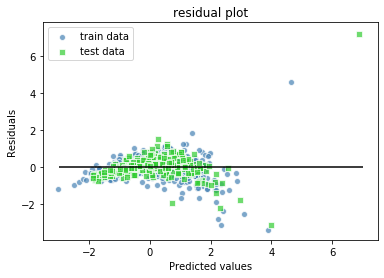

MSE train : 0.203
MSE test : 0.335
R^2 train : 0.797
R^2 test : 0.685


In [63]:
# この7つの特徴量で線形回帰
print('< Linear Regression (dimension:7) >')

# 訓練/検証データに分割
X = X_df.values
y = y_df.values.flatten()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# 標準化
sc_x = StandardScaler()
sc_y = StandardScaler()
sc_x.fit(X_train)
sc_y.fit(y_train[:, np.newaxis])
X_train_std = sc_x.transform(X_train)
X_test_std = sc_x.transform(X_test)
y_train_std = sc_y.transform(y_train[:, np.newaxis])
y_test_std = sc_y.transform(y_test[:, np.newaxis])

# 学習・推論
slr = LinearRegression()
slr.fit(X_train_std, y_train_std)
y_train_pred = slr.predict(X_train_std)
y_test_pred = slr.predict(X_test_std)

# 残差プロット
plt.title("residual plot")
plt.scatter(y_train_pred, y_train_pred - y_train_std, marker='o',
            color='steelblue', edgecolor='white', alpha=0.7, label='train data')
plt.scatter(y_test_pred, y_test_pred - y_test_std, marker='s',
            color='limegreen', edgecolor='white', alpha=0.7, label='test data')
plt.hlines(y=0, xmin=-3, xmax=7, color='black')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# 評価
MSEs = []
R2s = []
print('MSE train : {:.3f}'.format(mean_squared_error(y_train_std, y_train_pred)))
print('MSE test : {:.3f}'.format(mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train : {:.3f}'.format(r2_score(y_train_std, y_train_pred)))
print('R^2 test : {:.3f}'.format(r2_score(y_test_std, y_test_pred)))
MSEs.append(mean_squared_error(y_test_std, y_test_pred))
R2s.append(r2_score(y_test_std, y_test_pred))

< Support Vector Regression (dimension:7) >


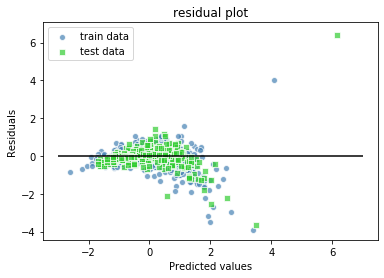

MSE train : 0.219
MSE test : 0.329
R^2 train : 0.781
R^2 test : 0.690


In [64]:
# 7つの特徴量でSVR
print('< Support Vector Regression (dimension:7) >')

# 学習・推論
y_train_std = y_train_std.flatten()
y_test_std = y_test_std.flatten()
svmreg = LinearSVR(max_iter=10**5)
svmreg.fit(X_train_std, y_train_std)
y_train_pred = svmreg.predict(X_train_std).flatten()
y_test_pred = svmreg.predict(X_test_std).flatten()

# 残差プロット
plt.title("residual plot")
plt.scatter(y_train_pred, y_train_pred - y_train_std, marker='o',
            color='steelblue', edgecolor='white', alpha=0.7, label='train data')
plt.scatter(y_test_pred, y_test_pred - y_test_std, marker='s',
            color='limegreen', edgecolor='white', alpha=0.7, label='test data')
plt.hlines(y=0, xmin=-3, xmax=7, color='black')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# 評価
print('MSE train : {:.3f}'.format(mean_squared_error(y_train_std, y_train_pred)))
print('MSE test : {:.3f}'.format(mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train : {:.3f}'.format(r2_score(y_train_std, y_train_pred)))
print('R^2 test : {:.3f}'.format(r2_score(y_test_std, y_test_pred)))
MSEs.append(mean_squared_error(y_test_std, y_test_pred))
R2s.append(r2_score(y_test_std, y_test_pred))

< Decision Tree (dimension:7) >


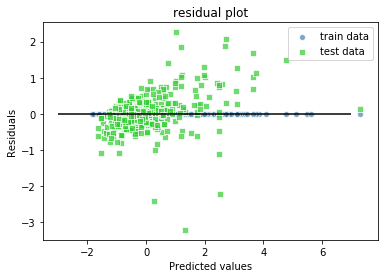

MSE train : 0.000
MSE test : 0.271
R^2 train : 1.000
R^2 test : 0.745


In [65]:
# 7つの特徴量で決定木
print('< Decision Tree (dimension:7) >')

# 学習・推論
tree = DecisionTreeRegressor()
tree.fit(X_train_std, y_train_std)
y_train_pred = tree.predict(X_train_std).flatten()
y_test_pred = tree.predict(X_test_std).flatten()

# 残差プロット
plt.title("residual plot")
plt.scatter(y_train_pred, y_train_pred - y_train_std, marker='o',
            color='steelblue', edgecolor='white', alpha=0.7, label='train data')
plt.scatter(y_test_pred, y_test_pred - y_test_std, marker='s',
            color='limegreen', edgecolor='white', alpha=0.7, label='test data')
plt.hlines(y=0, xmin=-3, xmax=7, color='black')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# 評価
print('MSE train : {:.3f}'.format(mean_squared_error(y_train_std, y_train_pred)))
print('MSE test : {:.3f}'.format(mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train : {:.3f}'.format(r2_score(y_train_std, y_train_pred)))
print('R^2 test : {:.3f}'.format(r2_score(y_test_std, y_test_pred)))
MSEs.append(mean_squared_error(y_test_std, y_test_pred))
R2s.append(r2_score(y_test_std, y_test_pred))

< Random Forest (dimension:7) >


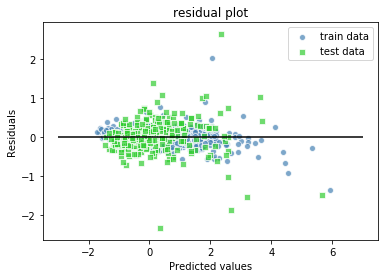

MSE train : 0.025
MSE test : 0.145
R^2 train : 0.975
R^2 test : 0.864


In [66]:
# 7つの特徴量でランダムフォレスト
print('< Random Forest (dimension:7) >')

# 学習・推論
y_train_std = y_train_std.flatten()
forest = RandomForestRegressor()
forest.fit(X_train_std, y_train_std)
y_train_pred = forest.predict(X_train_std)
y_test_pred = forest.predict(X_test_std)

# 残差プロット
plt.title("residual plot")
plt.scatter(y_train_pred, y_train_pred - y_train_std, marker='o',
            color='steelblue', edgecolor='white', alpha=0.7, label='train data')
plt.scatter(y_test_pred, y_test_pred - y_test_std, marker='s',
            color='limegreen', edgecolor='white', alpha=0.7, label='test data')
plt.hlines(y=0, xmin=-3, xmax=7, color='black')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# 評価
print('MSE train : {:.3f}'.format(mean_squared_error(y_train_std, y_train_pred)))
print('MSE test : {:.3f}'.format(mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train : {:.3f}'.format(r2_score(y_train_std, y_train_pred)))
print('R^2 test : {:.3f}'.format(r2_score(y_test_std, y_test_pred)))
MSEs.append(mean_squared_error(y_test_std, y_test_pred))
R2s.append(r2_score(y_test_std, y_test_pred))

In [67]:
# 指標一覧
metrics = pd.DataFrame([MSEs, R2s],
                       index=['MSE','R^2'],
                       columns=['LR', 'SVR', 'Tree', 'Forest'])
print('< Metrics (test data) >')
display(metrics.T)

< Metrics (test data) >


,MSE,R^2
LR,0.334932,0.685038
SVR,0.329356,0.690282
Tree,0.271371,0.744810
Forest,0.144634,0.863990


### ＜考察＞  
平均二乗誤差・決定係数ともに、1. ランダムフォレスト、2．決定木、3．SVR、4．線形回帰の順で良い値を示した。今回は決定木・ランダムフォレストの剪定をしていない。重回帰分析であるが、データ数が多いため決定係数は自由度調整をしていない。  
変数の次元が増えたため線形関係のみでは説明力が更に不足となり、表現力の高いランダムフォレストの指標値が他と比較して際立って良くなったように感じられる。  
残差の分布も、ランダムフォレストが最も原点の周囲にランダムに分布しているように見える。一方で線形モデルであるLRとSVRでは、三日月のようなパターンがみられる。  
多次元の回帰では、単純な線形モデルではバイアスがより高くなってしまったように思われる。